### Exercise 1.02
__Dealing with messy data__

_Missing data_

Import all the required elements. Next, load the tips dataset and store it in a variable called tips. Use the following code:

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
tips = sns.load_dataset('tips')

Next, create a variable called size to store the values of that feature from the dataset. As this dataset does not contain any missing data, we will convert the
top 16 values of the size variable into missing values. Print out the top 20
values of the age variable:

In [2]:
size = tips["size"]
size.loc[:15] = np.nan
size.head(20)

c:\Python310\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    3.0
17    3.0
18    3.0
19    3.0
Name: size, dtype: float64

The preceding code snippet creates the size variable as a slice of the dataset,
then coverts the top 16 values of the variable into Not a Number (NaN), which is
the representation of a missing value. Finally, it prints the top 20 values of
the variable.

Check the shape of the size variable:

In [3]:
size.shape

(244,)

Now, count the number of NaN values to determine how to handle them. Use
the isnull() function to find the NaN values, and use the sum() function to
sum them all:

In [4]:
size.isnull().sum()

16

The participation of the NaN values in the total size of the variable is 6.55%,
which can be calculated by dividing the number of missing values by the length
of the feature (16/244). Although this is not high enough to consider removing
the entire feature, there is a need to handle the missing values.

Let's choose the mean imputation methodology to replace the missing values.
To do so, compute the mean of the available values, as follows:

In [5]:
mean = size.mean()
mean = round(mean)
print(mean)

3


Replace all missing values with the mean. Use the fillna() function, which
takes every missing value and replaces it with the value that is defined inside
the parenthesis. To check that the values have been replaced, print the first 10
values again:

In [6]:
size.fillna(mean, inplace=True)
size.head(20)

0     3.0
1     3.0
2     3.0
3     3.0
4     3.0
5     3.0
6     3.0
7     3.0
8     3.0
9     3.0
10    3.0
11    3.0
12    3.0
13    3.0
14    3.0
15    3.0
16    3.0
17    3.0
18    3.0
19    3.0
Name: size, dtype: float64

_Outliers: Ploting_

Use Matplotlib to graph a histogram of the age variable. Use Matplotlib's
hist() function, as per the following code:

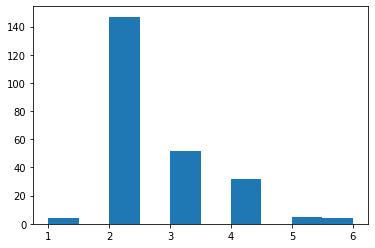

In [7]:
plt.hist(size)
plt.show()

Discover the outliers in the data. Let's use three standard deviations as the
measure to calculate the minimum and maximum values.
As we discussed previously, the min value is determined by calculating the mean
of all of the values and subtracting three standard deviations from it. Use the
following code to set the min value and store it in a variable named min_val:

In [8]:
min_val = size.mean() - (3 * size.std())
print(min_val)

-0.19743490657874485


The min value is around -0.1974. According to the min value, there are no
outliers at the left tail of the Gaussian distribution. This makes sense, given that
the distribution is tilted slightly to the left.
 
Opposite to the min value, for the max value, the standard deviations are added
to the mean to calculate the higher threshold. Calculate the max value, as shown
in the following code, and store it in a variable named max_val:

In [9]:
max_val = size.mean() + (3 * size.std())
print(max_val)

5.369566054119728


The max value, which comes to around 5.3695, determines that instances with
a size above 5.36 represent outliers. As you can see in the preceding diagram,
this also makes sense as those instances are far away from the bell of the
Gaussian distribution. 
 
Count the number of instances that are above the maximum value to decide
how to handle them, as per the instructions given here.
Using indexing, obtain the values in size that are above the max threshold
and store them in a variable called outliers. Then, count the outliers using
count(): 

In [10]:
outliers = size[size > max_val]
outliers.count()

4

Print out the outliers and check that the correct values were stored, as follows:

In [11]:
print(outliers)

125    6.0
141    6.0
143    6.0
156    6.0
Name: size, dtype: float64


Redefine the values stored in size by using indexing to include only values
below the max threshold. Then, print the shape of size:

In [12]:
age = size[size <= max_val]
age.shape

(240,)